In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as smt
from statsmodels.tsa.statsmodels imp


In [2]:
data = pd.read_csv('dataframe_full.csv')

In [3]:
data = data.set_index('Date')
data.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AAPL_Dividends,AAPL_Stock_Splits,A_Open,A_High,A_Low,...,ZUO_Volume,ZUO_Dividends,ZUO_Stock Splits,ZWS_Open,ZWS_High,ZWS_Low,ZWS_Close,ZWS_Volume,ZWS_Dividends,ZWS_Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-06 00:00:00-05:00,42.038652,42.236007,41.862960,42.002552,83241600,0.0,0.0,77.015197,77.169578,75.963502,...,957400,0.0,0.0,25.870498,26.063275,25.513863,25.513863,460600,0.0,0.0
2019-03-07 00:00:00-05:00,41.846107,41.983294,41.400861,41.516384,99185600,0.0,0.0,75.924890,76.320479,75.268785,...,1130400,0.0,0.0,25.513856,25.523495,24.983723,25.321081,380100,0.0,0.0
2019-03-08 00:00:00-05:00,40.991724,41.653579,40.794369,41.615070,95997600,0.0,0.0,75.432814,75.490704,74.680224,...,1086800,0.0,0.0,24.964447,25.340360,24.945169,25.186138,343800,0.0,0.0
2019-03-11 00:00:00-04:00,42.236007,43.109654,42.202313,43.056705,128044000,0.0,0.0,75.529311,76.677498,75.510017,...,1540600,0.0,0.0,25.176502,25.957243,24.974087,25.937965,546300,0.0,0.0
2019-03-12 00:00:00-04:00,43.321448,43.964049,43.169821,43.540462,129870400,0.0,0.0,76.783638,77.314307,76.378398,...,1250600,0.0,0.0,25.986160,26.121104,25.774107,25.957245,365400,0.0,0.0


In [4]:
data.columns

Index(['AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close', 'AAPL_Volume',
       'AAPL_Dividends', 'AAPL_Stock_Splits', 'A_Open', 'A_High', 'A_Low',
       ...
       'ZUO_Volume', 'ZUO_Dividends', 'ZUO_Stock Splits', 'ZWS_Open',
       'ZWS_High', 'ZWS_Low', 'ZWS_Close', 'ZWS_Volume', 'ZWS_Dividends',
       'ZWS_Stock Splits'],
      dtype='object', length=14373)

In [5]:
### Get unique list of stock symbols still in dataframe

stock_symbol_list = []
for a in data.columns:
    symbol = a.split('_')[0]
    if symbol not in stock_symbol_list:
        stock_symbol_list.append(symbol)

In [6]:
len(stock_symbol_list)

2053

In [7]:
### Get open price for all stocks

stock_open_price_col_list = []
for a in data.columns:
    symbol = a.split('_')[0]
    col_name = symbol + '_Open'
    if col_name not in stock_open_price_col_list:
        stock_open_price_col_list.append(col_name)

In [8]:
data_open = data[stock_open_price_col_list]

In [9]:
### Get volume for all stocks

stock_volume_col_list = []
for a in data.columns:
    symbol = a.split('_')[0]
    col_name = symbol + '_Volume'
    if col_name not in stock_volume_col_list:
        stock_volume_col_list.append(col_name)

In [10]:
data_volume = data[stock_volume_col_list]

In [11]:
data_volume

,AAPL_Volume,A_Volume,AA_Volume,AACG_Volume,AADI_Volume,AAL_Volume,AAME_Volume,AAOI_Volume,AAON_Volume,AAP_Volume,...,ZKIN_Volume,ZLAB_Volume,ZOM_Volume,ZS_Volume,ZTO_Volume,ZTR_Volume,ZTS_Volume,ZUMZ_Volume,ZUO_Volume,ZWS_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-06 00:00:00-05:00,83241600,1750500,2465600,240100,15753,6420800,100,973100,280950,1067900,...,785100,204700,327300,2371000,2643400,87600,2113000,299800,957400,460600
2019-03-07 00:00:00-05:00,99185600,1818100,3102400,73800,18307,7112400,1500,633300,143700,940700,...,376300,183300,53100,2242500,3069200,69900,4092500,594100,1130400,380100
2019-03-08 00:00:00-05:00,95997600,1483500,2864000,68800,25040,6200500,12600,709100,168150,1138200,...,468200,67400,17500,2423600,3092000,140400,2412800,896600,1086800,343800
2019-03-11 00:00:00-04:00,128044000,1210900,3497700,32100,13380,8944000,1100,628700,201600,1047800,...,261800,186900,64600,3669000,6427800,104700,2902100,602500,1540600,546300
2019-03-12 00:00:00-04:00,129870400,1532300,3112600,20200,14940,10887500,1700,721000,141900,871900,...,634300,76400,42600,2297600,7647900,109000,2433700,424100,1250600,365400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 00:00:00-05:00,136682600,2622600,6020200,65400,275700,33255900,6500,5229600,957800,2658600,...,19400,866400,9478900,6757300,3939300,272000,2849200,127400,5541300,754200
2024-03-01 00:00:00-05:00,73488000,1531000,6842600,114300,2544500,25740800,8600,3472300,879800,1937300,...,18300,542700,12029300,11811500,5896600,199000,3724300,125000,2752900,536300
2024-03-04 00:00:00-05:00,81510100,2169200,3954700,69000,3894100,65053000,7100,2622200,561400,2570200,...,23600,506500,8143900,4141500,8921400,182200,3757200,129500,2051900,681100


In [12]:
### Get HIGH for all stocks

stock_high_col_list = []
for a in data.columns:
    symbol = a.split('_')[0]
    col_name = symbol + '_High'
    if col_name not in stock_high_col_list:
        stock_high_col_list.append(col_name)

In [13]:
data_high = data[stock_high_col_list]

In [14]:
### Get low for all stocks

stock_low_col_list = []
for a in data.columns:
    symbol = a.split('_')[0]
    col_name = symbol + '_Low'
    if col_name not in stock_low_col_list:
        stock_low_col_list.append(col_name)

In [15]:
data_low = data[stock_low_col_list]

In [16]:
### Get close for all stocks

stock_close_col_list = []
for a in data.columns:
    symbol = a.split('_')[0]
    col_name = symbol + '_Close'
    if col_name not in stock_close_col_list:
        stock_close_col_list.append(col_name)

In [17]:
data_close = data[stock_close_col_list]

In [18]:
apple_open = data_open['AAPL_Open']

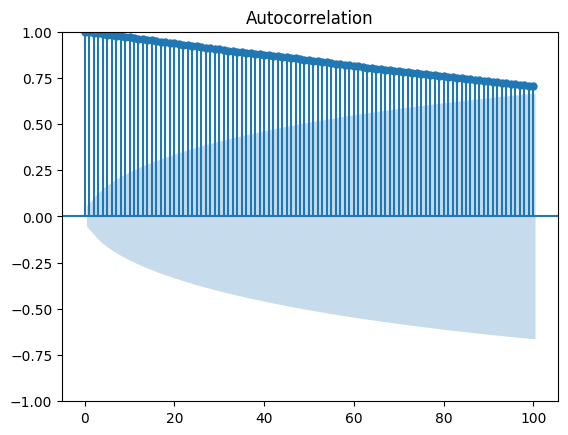

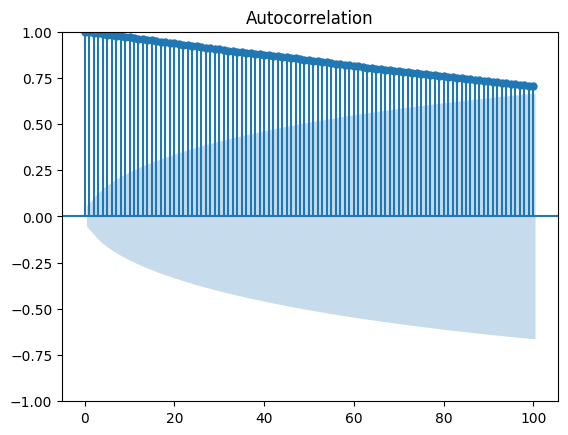

In [19]:
plot_acf(apple_open, lags=100)

### Univariate data

In [20]:
def split_sequence(sequence, n_steps):
    X, y = [],[]
    for i in range(len(sequence)):
        end_idx = i + n_steps
        if end_idx > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [21]:
n_steps=10
apple_open_x, apple_open_y = split_sequence(apple_open.to_numpy(), n_steps)

In [22]:
apple_open_x_train = apple_open_x[0:1160]
apple_open_x_test = apple_open_x[1160:]

apple_open_y_train = apple_open_y[0:1160]
apple_open_y_test = apple_open_y[1160:]

In [23]:
n_features=1
model1 = Sequential([
    LSTM(10, activation='relu', input_shape=(n_steps, n_features)),
    Dense(1, activation='relu')
])

model1.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [24]:
model1.fit(x=apple_open_x_train, y=apple_open_y_train, validation_data=[apple_open_x_test,apple_open_y_test], epochs=10)

Epoch 1/10
37/37 [==============================] - 3s 28ms/step - loss: 16095.2314 - mse: 16095.2314 - mae: 119.5474 - val_loss: 32461.2109 - val_mse: 32461.2109 - val_mae: 180.0289
Epoch 2/10
37/37 [==============================] - 1s 21ms/step - loss: 10123.1367 - mse: 10123.1367 - mae: 92.7340 - val_loss: 18995.1992 - val_mse: 18995.1992 - val_mae: 137.0918
Epoch 3/10
37/37 [==============================] - 1s 21ms/step - loss: 2051.0615 - mse: 2051.0615 - mae: 34.9340 - val_loss: 497.7687 - val_mse: 497.7687 - val_mae: 21.2928
Epoch 4/10
37/37 [==============================] - 1s 24ms/step - loss: 113.7277 - mse: 113.7277 - mae: 7.9710 - val_loss: 97.5515 - val_mse: 97.5515 - val_mae: 8.1885
Epoch 5/10
37/37 [==============================] - 1s 22ms/step - loss: 41.1184 - mse: 41.1184 - mae: 4.7677 - val_loss: 47.8258 - val_mse: 47.8258 - val_mae: 5.5893
Epoch 6/10
37/37 [==============================] - 1s 22ms/step - loss: 33.2156 - mse: 33.2156 - mae: 4.2895 - val_loss: 50

| model results | model1 - apple only|
| :----- | :-----|
| Lags | 10 |
| LSTM | 10 |
| epochs | 10 |
| train mae | 122 |
| test mae | 186 |
| train mse | 16881 |
| test mse | 34747 |
| ------- | model2 - apple only |
| Lags | 50 |
| LSTM | 10 |
| epochs | 10 |
| train mae | 118 |
| test mae | 185 |
| train mse | 17124 |
| test mse | 185 |




# Multivariate analysis
first getting cross correlation of data to aapl

In [27]:
forwards = smt.ccf(data_open['AAPL_Open'],data_open['NVDA_Open'], adjusted=False)
backwards = smt.ccf(data_open['AAPL_Open'],data_open['NVDA_Open'], adjusted=False)[::-1]

In [28]:
ccf_output = np.r_[backwards[:-1], forwards]

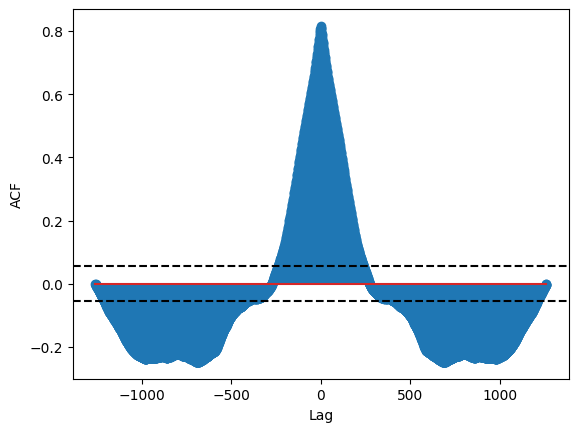

In [29]:
plt.stem(range(-len(ccf_output)//2, len(ccf_output)//2), ccf_output)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.axhline(-1.96/np.sqrt(len(data)), color='k', ls='--') 
plt.axhline(1.96/np.sqrt(len(data)), color='k', ls='--')

In [30]:
def ccf_finder(series1_symbol, series2_symbol, ccf_df):
    series1 = data_open[series1_symbol + '_Open']
    series2 = data_open[series2_symbol + '_Open']
    forwards = smt.ccf(series1, series2, adjusted=False)
    backwards = smt.ccf(series1, series2, adjusted=False)[::-1]
    output = np.r_[backwards[:-1], forwards]
    lag_range = range(-len(output)//2, len(output)//2)
    
    max_output = output[np.argmax(output)]
    max_lag = lag_range[np.argmax(output)]
    min_output = output[np.argmin(output)]
    min_lag = lag_range[np.argmin(output)]
    ccf_df.loc[len(ccf_df)] = (series1_symbol, series2_symbol,max_output, max_lag, min_output, min_lag)
    return ccf_df

In [31]:
ccf_apple_df = pd.DataFrame(columns=['stock1','stock2','max_ccf','max_ccf_lag','min_ccf','min_ccf_lag'])

for stock in stock_symbol_list:
    if stock != 'AAPL':
        ccf_apple_df = ccf_finder('AAPL', stock, ccf_apple_df)

In [32]:
ccf_apple_df.sort_values(by='max_ccf', ascending=False)

,stock1,stock2,max_ccf,max_ccf_lag,min_ccf,min_ccf_lag
692,AAPL,FAST,0.958722,-1,-0.353687,-980
1243,AAPL,MSFT,0.957450,-1,-0.326265,-986
1396,AAPL,ODFL,0.950275,-1,-0.325775,-982
1225,AAPL,MPWR,0.947544,-1,-0.336482,-979
499,AAPL,CWST,0.945919,-1,-0.326350,-980
...,...,...,...,...,...,...
21,AAPL,AC,0.125866,-373,-0.148634,-605
1641,AAPL,RYTM,0.125223,-723,-0.304895,-400
1293,AAPL,NBR,0.118941,-1169,-0.292174,-797
972,AAPL,IOR,0.118379,-1,-0.106290,-162


In [33]:
stock_list_greater_point_five_corr_apple = ccf_apple_df['stock2'][(ccf_apple_df['max_ccf'] >= 0.5) & (ccf_apple_df['max_ccf_lag'] <= 10)]


In [34]:
len(stock_list_greater_point_five_corr_apple)

761

The list I created has 761 stocks that have a correlation value greater than 0.5 within 10 lag values of apple stock price.

In [41]:
stock_list_greater_point_five_corr_apple_open = [] 
[stock_list_greater_point_five_corr_apple_open.append(a + '_Open') for a in stock_list_greater_point_five_corr_apple.values]

stock_list_greater_point_five_corr_apple_volume = []
[stock_list_greater_point_five_corr_apple_volume.append(a + '_Volume') for a in stock_list_greater_point_five_corr_apple.values]

stock_list_greater_point_five_corr_apple_low = [] 
[stock_list_greater_point_five_corr_apple_low.append(a + '_Low') for a in stock_list_greater_point_five_corr_apple.values]

stock_list_greater_point_five_corr_apple_high = []
[stock_list_greater_point_five_corr_apple_high.append(a + '_High') for a in stock_list_greater_point_five_corr_apple.values]

stock_list_greater_point_five_corr_apple_close = []
[stock_list_greater_point_five_corr_apple_close.append(a + '_Close') for a in stock_list_greater_point_five_corr_apple.values]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [42]:
stock_list_greater_point_five_corr_apple_open.append('AAPL_Open')
stock_list_greater_point_five_corr_apple_volume.append('AAPL_Volume')
stock_list_greater_point_five_corr_apple_low.append('AAPL_Low')
stock_list_greater_point_five_corr_apple_high.append('AAPL_High')
stock_list_greater_point_five_corr_apple_close.append('AAPL_Close')


# Following tensorflow tutorial at https://www.tensorflow.org/tutorials/structured_data/time_series#the_weather_dataset

In [48]:
# data_only_apple_corr = data_open[stock_list_greater_point_five_corr_apple_open]
# n_features_selected = 1260

n_features_selected = 500
data_only_apple_corr = data_open[stock_list_greater_point_five_corr_apple_open[0:n_features_selected]]
try:
    data_only_apple_corr = data_only_apple_corr.drop(['AAPL_Open'])
except:
    pass
data_only_apple_corr['AAPL_Open'] = data_open['AAPL_Open'].copy()

C:\Users\lvden\AppData\Local\Temp\ipykernel_2264\3074092898.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_only_apple_corr['AAPL_Open'] = data_open['AAPL_Open'].copy()
C:\Users\lvden\AppData\Local\Temp\ipykernel_2264\3074092898.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_only_apple_corr['AAPL_Open'] = data_open['AAPL_Open'].copy()


In [49]:
### Data Adjustments
differencing_flag = True
standardize_flag = True
day_of_year_flag = True
day_of_week_flag = True

volume_all_stocks_flag = True 
low_all_stocks_flag = True
high_all_stocks_flag = True

lstm_units = 80

### Differencing
if differencing_flag == True:
    data_only_apple_corr = data_only_apple_corr.diff().dropna()

### Introducing a new variable, number of the day in the year

if day_of_year_flag == True:
    day_of_year_list = []
    for val in data_only_apple_corr.index:
        day_of_year = pd.Period(val).day_of_year
        day_of_year_list.append(day_of_year)
    data_only_apple_corr['day_of_year'] = day_of_year_list

if day_of_week_flag == True:
    day_of_week_list = []
    for val in data_only_apple_corr.index:
        day_of_week = pd.Period(val).day_of_week
        day_of_week_list.append(day_of_week)
    data_only_apple_corr['day_of_week'] = day_of_week_list

if volume_all_stocks_flag == True:
    data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                    data_volume[stock_list_greater_point_five_corr_apple_volume[0:n_features_selected]],
                                   on='Date')
if low_all_stocks_flag == True:
    data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                    data_low[stock_list_greater_point_five_corr_apple_low[0:n_features_selected]],
                                   on='Date')

if high_all_stocks_flag == True:
    data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                    data_high[stock_list_greater_point_five_corr_apple_high[0:n_features_selected]],
                                   on='Date')


C:\Users\lvden\AppData\Local\Temp\ipykernel_2264\2016818585.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_only_apple_corr['day_of_year'] = day_of_year_list
C:\Users\lvden\AppData\Local\Temp\ipykernel_2264\2016818585.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_only_apple_corr['day_of_week'] = day_of_week_list


In [50]:
column_indices = {name: i for i, name in enumerate(data_only_apple_corr.columns)}

n = len(data_only_apple_corr)
train_df = data_only_apple_corr[0:int(n*0.7)]
val_df = data_only_apple_corr[int(n*0.7):int(n*0.9)]
test_df = data_only_apple_corr[int(n*0.9):]

num_features = data_only_apple_corr.shape[1]


In [51]:
train_mean = train_df.mean()
train_std = train_df.std()

if standardize_flag == True:
    train_df = (train_df - train_mean) / train_std
    val_df = (val_df - train_mean) / train_std
    test_df = (test_df - train_mean) / train_std


In [52]:
# df_std = (data_only_apple_corr - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(data_only_apple_corr.keys(), rotation=90)


In [53]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [54]:
def plot(self, model=None, plot_col='AAPL_Open', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Date')

WindowGenerator.plot = plot


In [55]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window


In [56]:
w2 = WindowGenerator(input_width=10, label_width=1, shift=1,
                     label_columns=['AAPL_Open'])
w2


Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): ['AAPL_Open']

In [57]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 11, 2003)
Inputs shape: (3, 10, 2003)
Labels shape: (3, 1, 1)


In [58]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset


In [96]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example


In [60]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['AAPL_Open'])
single_step_window


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['AAPL_Open']

In [61]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 1, 2003)
Labels shape (batch, time, features): (32, 1, 1)


In [62]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [63]:
baseline = Baseline(label_index=column_indices['AAPL_Open'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanAbsolutePercentageError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)


8/8 [==============================] - 0s 3ms/step - loss: 2.4224 - mean_absolute_error: 1.1933 - mean_absolute_percentage_error: 4096.6313


In [64]:
wide_window = WindowGenerator(
    input_width=10, label_width=10, shift=1,
    label_columns=['AAPL_Open'])

wide_window


Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 1  2  3  4  5  6  7  8  9 10]
Label column name(s): ['AAPL_Open']

In [65]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(lstm_units, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1),
])


In [66]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError(),
                        tf.keras.metrics.MAPE])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history


In [67]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)
print(performance)

8/8 [==============================] - 0s 6ms/step - loss: 2.2735 - mean_absolute_error: 1.2195 - mean_absolute_percentage_error: 3473.4429
{'Baseline': {'loss': 2.0856449604034424, 'mean_absolute_error': 1.005099892616272, 'mean_absolute_percentage_error': 896.5127563476562}, 'LSTM': {'loss': 2.9335577487945557, 'mean_absolute_error': 1.4682377576828003, 'mean_absolute_percentage_error': 1426.147216796875}}


In [68]:
# wide_window.plot(lstm_model)
# plt.suptitle('Three random predictions')
# plt.show

In [69]:
for key in performance:
    for key2 in performance[key]:
        performance[key][key2] = np.round(performance[key][key2], 5)

In [70]:
print(performance)
print('standardize: ' + str(standardize_flag))
print('differencing: ' + str(differencing_flag))
print('day_of_year:' + str(day_of_year_flag))
print('day of week: ' + str(day_of_week_flag))
print('volume: ' + str(volume_all_stocks_flag))
print('high: ' + str(high_all_stocks_flag))
print('low: ' + str(low_all_stocks_flag))
print('num features: ' + str(n_features_selected))
print('LSTM units: ' + str(lstm_units))

{'Baseline': {'loss': 2.08564, 'mean_absolute_error': 1.0051, 'mean_absolute_percentage_error': 896.51276}, 'LSTM': {'loss': 2.93356, 'mean_absolute_error': 1.46824, 'mean_absolute_percentage_error': 1426.14722}}
standardize: True
differencing: True
day_of_year:True
day of week: True
volume: True
high: True
low: True
num features: 500
LSTM units: 80


In [71]:
def lstm_apple_modeling(data_open, stock_list_greater_point_five_corr_apple_open,
                        stock_list_greater_point_five_corr_apple_volume,
                        stock_list_greater_point_five_corr_apple_low,
                        stock_list_greater_point_five_corr_apple_high,                        
                        n_features_selected,
                       differencing_flag, standardize_flag, day_of_year_flag, day_of_week_flag,
                       volume_all_stocks_flag, low_all_stocks_flag, high_all_stocks_flag, lstm_units):

    '''data_open is the data frame data_open
       stock_list_greater_point_five_corr_apple_open is stock_list_greater_point_five_corr_apple_open
       n_features_selected is between 1 and 761
       all flags are booleans
       lstm_units is the number of units in the lstm'''
    ### Original data and the number of additional points that we want
    n_features_selected = n_features_selected
    data_only_apple_corr = data_open[stock_list_greater_point_five_corr_apple_open[0:n_features_selected]]
    try:
        data_only_apple_corr = data_only_apple_corr.drop(['AAPL_Open'])
    except:
        pass
    data_only_apple_corr['AAPL_Open'] = data_open['AAPL_Open'].copy()

    ### Data Adjustments
    differencing_flag = differencing_flag
    standardize_flag = standardize_flag
    day_of_year_flag = day_of_year_flag
    day_of_week_flag = day_of_week_flag
    
    volume_all_stocks_flag = volume_all_stocks_flag 
    low_all_stocks_flag = low_all_stocks_flag
    high_all_stocks_flag = high_all_stocks_flag
    
    lstm_units = lstm_units
    
    ### Differencing
    if differencing_flag == True:
        data_only_apple_corr = data_only_apple_corr.diff().dropna()
    
    ### Introducing a new variable, number of the day in the year
    
    if day_of_year_flag == True:
        day_of_year_list = []
        for val in data_only_apple_corr.index:
            day_of_year = pd.Period(val).day_of_year
            day_of_year_list.append(day_of_year)
        data_only_apple_corr['day_of_year'] = day_of_year_list
    
    if day_of_week_flag == True:
        day_of_week_list = []
        for val in data_only_apple_corr.index:
            day_of_week = pd.Period(val).day_of_week
            day_of_week_list.append(day_of_week)
        data_only_apple_corr['day_of_week'] = day_of_week_list
    
    if volume_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_volume[stock_list_greater_point_five_corr_apple_volume[0:n_features_selected]],
                                       on='Date')
    if low_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_low[stock_list_greater_point_five_corr_apple_low[0:n_features_selected]],
                                       on='Date')
    
    if high_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_high[stock_list_greater_point_five_corr_apple_high[0:n_features_selected]],
                                       on='Date')

    column_indices = {name: i for i, name in enumerate(data_only_apple_corr.columns)}
    n = len(data_only_apple_corr)
    train_df = data_only_apple_corr[0:int(n*0.7)]
    val_df = data_only_apple_corr[int(n*0.7):int(n*0.9)]
    test_df = data_only_apple_corr[int(n*0.9):]
    num_features = data_only_apple_corr.shape[1]


    train_mean = train_df.mean()
    train_std = train_df.std()
    
    if standardize_flag == True:
        train_df = (train_df - train_mean) / train_std
        val_df = (val_df - train_mean) / train_std
        test_df = (test_df - train_mean) / train_std

    @property
    def train(self):
      return self.make_dataset(self.train_df)
    
    @property
    def val(self):
      return self.make_dataset(self.val_df)
    
    @property
    def test(self):
      return self.make_dataset(self.test_df)
    
    @property
    def example(self):
      """Get and cache an example batch of `inputs, labels` for plotting."""
      result = getattr(self, '_example', None)
      if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
      return result
    
    WindowGenerator.train = train
    WindowGenerator.val = val
    WindowGenerator.test = test
    WindowGenerator.example = example

    baseline = Baseline(label_index=column_indices['AAPL_Open'])
    
    baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.MeanAbsoluteError(),
                             tf.keras.metrics.MeanAbsolutePercentageError()])
    
    val_performance = {}
    performance = {}
    val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
    performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

    
    wide_window = WindowGenerator(
        input_width=10, label_width=10, shift=1,
        label_columns=['AAPL_Open'])

    lstm_model = tf.keras.models.Sequential([
        # Shape [batch, time, features] => [batch, time, lstm_units]
        tf.keras.layers.LSTM(lstm_units, return_sequences=True),
        # Shape => [batch, time, features]
        tf.keras.layers.Dense(units=1),
    ])

    history = compile_and_fit(lstm_model, wide_window)

    IPython.display.clear_output()
    val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
    performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

    for key in performance:
        for key2 in performance[key]:
            performance[key][key2] = np.round(performance[key][key2], 5)

    return [n_features_selected, differencing_flag, standardize_flag, day_of_year_flag, day_of_week_flag,
            volume_all_stocks_flag, low_all_stocks_flag, high_all_stocks_flag, lstm_units, performance]

In [73]:
output = lstm_apple_modeling(data_open, stock_list_greater_point_five_corr_apple_open,
                        stock_list_greater_point_five_corr_apple_volume,
                        stock_list_greater_point_five_corr_apple_low,
                        stock_list_greater_point_five_corr_apple_high,                        
                        n_features_selected = 50,
                       differencing_flag = True, standardize_flag = True, day_of_year_flag = True, day_of_week_flag = True,
                       volume_all_stocks_flag = True, low_all_stocks_flag = True, high_all_stocks_flag = True, 
                    lstm_units=64)

output

8/8 [==============================] - 0s 5ms/step - loss: 1.6145 - mean_absolute_error: 0.9928 - mean_absolute_percentage_error: 2442.2749


[50,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 64,
 {'Baseline': {'loss': 2.6086,
   'mean_absolute_error': 1.23811,
   'mean_absolute_percentage_error': 816.99316},
  'LSTM': {'loss': 1.68059,
   'mean_absolute_error': 1.02552,
   'mean_absolute_percentage_error': 808.25592}}]

In [72]:
# grid_search_df = pd.DataFrame(columns=['n_features_selected',
#                        'differencing_flag', 'standardize_flag', 'day_of_year_flag', 'day_of_week_flag',
#                        'volume_all_stocks_flag', 'low_all_stocks_flag', 'high_all_stocks_flag', 'lstm_units',
#                         'baseline--loss','baseline--MAE','baseline--MAPE','LSTM--loss','LSTM--MAE','LSTM--MAPE'])

In [1020]:
input('Are you sure you want to run this long function?')
grid_search_df = pd.DataFrame(columns=['n_features_selected',
                       'differencing_flag', 'standardize_flag', 'day_of_year_flag', 'day_of_week_flag',
                       'volume_all_stocks_flag', 'low_all_stocks_flag', 'high_all_stocks_flag', 'lstm_units',
                        'baseline--loss','LSTM--loss','baseline--MAE','LSTM--MAE','baseline--MAPE','LSTM--MAPE'])

flag_range_diff = [False, True]
flag_range_stand = [False, True]
flag_range_doy = [False, True]
flag_range_dow = [False, True]
flag_range_vol = [False, True]
flag_range_low = [False, True]
flag_range_high = [False, True]

n_features_selected_range = [10,50,100,500,761]
lstm_units_range = [16,32,64,80,100,128,150]

for flag_range_diff_val in flag_range_diff:
    for flag_range_stand_val in flag_range_stand:
        for flag_range_doy_val in flag_range_doy:
            for flag_range_dow_val in flag_range_dow:
                for flag_range_vol_val in flag_range_vol:
                    for flag_range_low_val in flag_range_low:
                        for flag_range_high_val in flag_range_high:
                            for n_features_selected_range_val in n_features_selected_range:
                                for lstm_units_range_val in lstm_units_range:
                                    output = lstm_apple_modeling(data_open, stock_list_greater_point_five_corr_apple_open,
                                            stock_list_greater_point_five_corr_apple_volume,
                                            stock_list_greater_point_five_corr_apple_low,
                                            stock_list_greater_point_five_corr_apple_high,                        
                                            n_features_selected = n_features_selected_range_val,
                                            differencing_flag = flag_range_diff_val, standardize_flag = flag_range_stand_val,
                                            day_of_year_flag = flag_range_doy_val, day_of_week_flag = flag_range_dow_val,
                                            volume_all_stocks_flag = flag_range_vol_val, low_all_stocks_flag = flag_range_low_val, 
                                            high_all_stocks_flag = flag_range_high_val, 
                                            lstm_units=lstm_units_range_val)

                                    grid_search_df.loc[len(grid_search_df)] = [output[0], output[1],output[2],output[3],output[4],output[5],output[6],
                                          output[7],output[8], output[9]['Baseline']['loss'],
                                          output[9]['LSTM']['loss'],
                                          output[9]['Baseline']['mean_absolute_error'],
                                          output[9]['LSTM']['mean_absolute_error'],
                                          output[9]['Baseline']['mean_absolute_percentage_error'],
                                          output[9]['LSTM']['mean_absolute_percentage_error']]

8/8 [==============================] - 0s 7ms/step - loss: 1.7678 - mean_absolute_error: 1.0587 - mean_absolute_percentage_error: 913.6345


In [1023]:
grid_search_df

,n_features_selected,differencing_flag,standardize_flag,day_of_year_flag,day_of_week_flag,volume_all_stocks_flag,low_all_stocks_flag,high_all_stocks_flag,lstm_units,baseline--loss,baseline--MAE,baseline--MAPE,LSTM--loss,LSTM--MAE,LSTM--MAPE
0,10,False,False,False,False,False,False,False,16,1.67432,1.48269,0.98526,0.92347,931.18915,414.22079
1,10,False,False,False,False,False,False,False,32,1.67432,2.82853,0.98526,1.42792,931.18909,1279.23767
2,10,False,False,False,False,False,False,False,64,1.67432,1.65938,0.98526,1.04655,931.18903,732.84369
3,10,False,False,False,False,False,False,False,80,1.67432,3.94250,0.98526,1.74916,931.18915,1608.60669
4,10,False,False,False,False,False,False,False,100,1.67432,1.91826,0.98526,1.11139,931.18909,916.81421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,761,True,True,True,True,True,True,True,64,1.84789,1.26481,1.02331,0.88474,490.31500,625.78973
4476,761,True,True,True,True,True,True,True,80,1.84789,2.47924,1.02331,1.30326,490.31500,1149.26208
4477,761,True,True,True,True,True,True,True,100,1.84789,1.53186,1.02331,1.00390,490.31500,770.56958
4478,761,True,True,True,True,True,True,True,128,1.84789,1.36717,1.02331,0.92803,490.31500,563.98590


In [1025]:
# grid_search_df.to_csv('LSTM_grid_search_results.csv')

### The best performance was diff=true, stand=true the rest false, 128ltm unites and all 761 features. The baseline mae was 1.02 and the lstm mae was 0.719. 
Will now try to include all other stocks to see if it is better and also try to include the closing price for the day.

In [74]:
def lstm_apple_modeling_v2(data_open, stock_list_greater_point_five_corr_apple_open,
                        stock_list_greater_point_five_corr_apple_volume,
                        stock_list_greater_point_five_corr_apple_low,
                        stock_list_greater_point_five_corr_apple_high,    
                        stock_list_greater_point_five_corr_apple_close,
                        n_features_selected,
                       differencing_flag, standardize_flag, day_of_year_flag, day_of_week_flag,
                       volume_all_stocks_flag, low_all_stocks_flag, high_all_stocks_flag, close_all_stocks_flag, lstm_units):

    '''VERSION 2 INCLUDES THE CLOSED SALE PRICE 
        data_open is the data frame data_open
       stock_list_greater_point_five_corr_apple_open is stock_list_greater_point_five_corr_apple_open
       n_features_selected is between 1 and 761
       all flags are booleans
       lstm_units is the number of units in the lstm'''
    ### Original data and the number of additional points that we want
    n_features_selected = n_features_selected
    data_only_apple_corr = data_open[stock_list_greater_point_five_corr_apple_open[0:n_features_selected]]
    try:
        data_only_apple_corr = data_only_apple_corr.drop(['AAPL_Open'])
    except:
        pass
    data_only_apple_corr['AAPL_Open'] = data_open['AAPL_Open'].copy()

    ### Data Adjustments
    differencing_flag = differencing_flag
    standardize_flag = standardize_flag
    day_of_year_flag = day_of_year_flag
    day_of_week_flag = day_of_week_flag
    
    volume_all_stocks_flag = volume_all_stocks_flag 
    low_all_stocks_flag = low_all_stocks_flag
    high_all_stocks_flag = high_all_stocks_flag
    
    lstm_units = lstm_units
    
    ### Differencing
    if differencing_flag == True:
        data_only_apple_corr = data_only_apple_corr.diff().dropna()
    
    ### Introducing a new variable, number of the day in the year
    
    if day_of_year_flag == True:
        day_of_year_list = []
        for val in data_only_apple_corr.index:
            day_of_year = pd.Period(val).day_of_year
            day_of_year_list.append(day_of_year)
        data_only_apple_corr['day_of_year'] = day_of_year_list
    
    if day_of_week_flag == True:
        day_of_week_list = []
        for val in data_only_apple_corr.index:
            day_of_week = pd.Period(val).day_of_week
            day_of_week_list.append(day_of_week)
        data_only_apple_corr['day_of_week'] = day_of_week_list
    
    if volume_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_volume[stock_list_greater_point_five_corr_apple_volume[0:n_features_selected]],
                                       on='Date')
    if low_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_low[stock_list_greater_point_five_corr_apple_low[0:n_features_selected]],
                                       on='Date')
    
    if high_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_high[stock_list_greater_point_five_corr_apple_high[0:n_features_selected]],
                                       on='Date')

    column_indices = {name: i for i, name in enumerate(data_only_apple_corr.columns)}
    n = len(data_only_apple_corr)
    train_df = data_only_apple_corr[0:int(n*0.7)]
    val_df = data_only_apple_corr[int(n*0.7):int(n*0.9)]
    test_df = data_only_apple_corr[int(n*0.9):]
    num_features = data_only_apple_corr.shape[1]


    train_mean = train_df.mean()
    train_std = train_df.std()
    
    if standardize_flag == True:
        train_df = (train_df - train_mean) / train_std
        val_df = (val_df - train_mean) / train_std
        test_df = (test_df - train_mean) / train_std

    @property
    def train(self):
      return self.make_dataset(self.train_df)
    
    @property
    def val(self):
      return self.make_dataset(self.val_df)
    
    @property
    def test(self):
      return self.make_dataset(self.test_df)
    
    @property
    def example(self):
      """Get and cache an example batch of `inputs, labels` for plotting."""
      result = getattr(self, '_example', None)
      if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
      return result
    
    WindowGenerator.train = train
    WindowGenerator.val = val
    WindowGenerator.test = test
    WindowGenerator.example = example

    baseline = Baseline(label_index=column_indices['AAPL_Open'])
    
    baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.MeanAbsoluteError(),
                             tf.keras.metrics.MeanAbsolutePercentageError()])
    
    val_performance = {}
    performance = {}
    val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
    performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

    
    wide_window = WindowGenerator(
        input_width=10, label_width=10, shift=1,
        label_columns=['AAPL_Open'])

    lstm_model = tf.keras.models.Sequential([
        # Shape [batch, time, features] => [batch, time, lstm_units]
        tf.keras.layers.LSTM(lstm_units, return_sequences=True),
        # Shape => [batch, time, features]
        tf.keras.layers.Dense(units=1),
    ])

    history = compile_and_fit(lstm_model, wide_window)

    IPython.display.clear_output()
    val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
    performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

    for key in performance:
        for key2 in performance[key]:
            performance[key][key2] = np.round(performance[key][key2], 5)

    return [n_features_selected, differencing_flag, standardize_flag, day_of_year_flag, day_of_week_flag,
            volume_all_stocks_flag, low_all_stocks_flag, high_all_stocks_flag, lstm_units, performance]

In [75]:
output = lstm_apple_modeling_v2(data_open, stock_list_greater_point_five_corr_apple_open,
                                            stock_list_greater_point_five_corr_apple_volume,
                                            stock_list_greater_point_five_corr_apple_low,
                                            stock_list_greater_point_five_corr_apple_high,    
                                            stock_list_greater_point_five_corr_apple_close,
                                            n_features_selected = 761,
                                            differencing_flag = True, standardize_flag = True,
                                            day_of_year_flag = False, day_of_week_flag = False,
                                            volume_all_stocks_flag = False, low_all_stocks_flag = False, 
                                            high_all_stocks_flag = False, close_all_stocks_flag=True, 
                                            lstm_units=128)

8/8 [==============================] - 0s 5ms/step - loss: 2.4059 - mean_absolute_error: 1.2614 - mean_absolute_percentage_error: 2288.0359


In [76]:
output

[761,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 128,
 {'Baseline': {'loss': 1.84789,
   'mean_absolute_error': 1.02331,
   'mean_absolute_percentage_error': 490.31503},
  'LSTM': {'loss': 2.71602,
   'mean_absolute_error': 1.38928,
   'mean_absolute_percentage_error': 1272.73157}}]

### Not better

In [78]:
def lstm_apple_modeling_v3(data_open, differencing_flag, standardize_flag, day_of_year_flag, day_of_week_flag,
                       volume_all_stocks_flag, low_all_stocks_flag, high_all_stocks_flag, close_all_stocks_flag, lstm_units):

    '''VERSION 2 INCLUDES THE CLOSED SALE PRICE OPTION AND ALL DATA IS USED
        data_open is the data frame data_open
       stock_list_greater_point_five_corr_apple_open is stock_list_greater_point_five_corr_apple_open
       n_features_selected is between 1 and 761
       all flags are booleans
       lstm_units is the number of units in the lstm'''
    ### Original data and the number of additional points that we want
    data_only_apple_corr = data_open
    try:
        data_only_apple_corr = data_only_apple_corr.drop(['AAPL_Open'])
    except:
        pass
    data_only_apple_corr['AAPL_Open'] = data_open['AAPL_Open'].copy()

    ### Data Adjustments
    differencing_flag = differencing_flag
    standardize_flag = standardize_flag
    day_of_year_flag = day_of_year_flag
    day_of_week_flag = day_of_week_flag
    
    volume_all_stocks_flag = volume_all_stocks_flag 
    low_all_stocks_flag = low_all_stocks_flag
    high_all_stocks_flag = high_all_stocks_flag
    
    lstm_units = lstm_units
    
    ### Differencing
    if differencing_flag == True:
        data_only_apple_corr = data_only_apple_corr.diff().dropna()
    
    ### Introducing a new variable, number of the day in the year
    
    if day_of_year_flag == True:
        day_of_year_list = []
        for val in data_only_apple_corr.index:
            day_of_year = pd.Period(val).day_of_year
            day_of_year_list.append(day_of_year)
        data_only_apple_corr['day_of_year'] = day_of_year_list
    
    if day_of_week_flag == True:
        day_of_week_list = []
        for val in data_only_apple_corr.index:
            day_of_week = pd.Period(val).day_of_week
            day_of_week_list.append(day_of_week)
        data_only_apple_corr['day_of_week'] = day_of_week_list
    
    if volume_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_volume,
                                       on='Date')
    if low_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_low,
                                       on='Date')
    
    if high_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_high,
                                       on='Date')

    column_indices = {name: i for i, name in enumerate(data_only_apple_corr.columns)}
    n = len(data_only_apple_corr)
    train_df = data_only_apple_corr[0:int(n*0.7)]
    val_df = data_only_apple_corr[int(n*0.7):int(n*0.9)]
    test_df = data_only_apple_corr[int(n*0.9):]
    num_features = data_only_apple_corr.shape[1]


    train_mean = train_df.mean()
    train_std = train_df.std()
    
    if standardize_flag == True:
        train_df = (train_df - train_mean) / train_std
        val_df = (val_df - train_mean) / train_std
        test_df = (test_df - train_mean) / train_std

    @property
    def train(self):
      return self.make_dataset(self.train_df)
    
    @property
    def val(self):
      return self.make_dataset(self.val_df)
    
    @property
    def test(self):
      return self.make_dataset(self.test_df)
    
    @property
    def example(self):
      """Get and cache an example batch of `inputs, labels` for plotting."""
      result = getattr(self, '_example', None)
      if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
      return result

    WindowGenerator.train = train
    WindowGenerator.val = val
    WindowGenerator.test = test
    WindowGenerator.example = example

    baseline = Baseline(label_index=column_indices['AAPL_Open'])
    
    baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.MeanAbsoluteError(),
                             tf.keras.metrics.MeanAbsolutePercentageError()])
    
    val_performance = {}
    performance = {}
    val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
    performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

    
    wide_window = WindowGenerator(
        input_width=10, label_width=10, shift=1,
        label_columns=['AAPL_Open'])

    lstm_model = tf.keras.models.Sequential([
        # Shape [batch, time, features] => [batch, time, lstm_units]
        tf.keras.layers.LSTM(lstm_units, return_sequences=True),
        # Shape => [batch, time, features]
        tf.keras.layers.Dense(units=1),
    ])

    history = compile_and_fit(lstm_model, wide_window)

    IPython.display.clear_output()
    val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
    performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

    for key in performance:
        for key2 in performance[key]:
            performance[key][key2] = np.round(performance[key][key2], 5)

    return [n_features_selected, differencing_flag, standardize_flag, day_of_year_flag, day_of_week_flag,
            volume_all_stocks_flag, low_all_stocks_flag, high_all_stocks_flag, lstm_units, performance]

In [79]:
output = lstm_apple_modeling_v3(data_open,  differencing_flag = True, standardize_flag = True,
                                            day_of_year_flag = False, day_of_week_flag = False,
                                            volume_all_stocks_flag = False, low_all_stocks_flag = False, 
                                            high_all_stocks_flag = False, close_all_stocks_flag=False, 
                                            lstm_units=128)

8/8 [==============================] - 0s 4ms/step - loss: 1.8439 - mean_absolute_error: 1.0700 - mean_absolute_percentage_error: 801.7537


In [80]:
output

[500,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 128,
 {'Baseline': {'loss': 2.034,
   'mean_absolute_error': 1.10475,
   'mean_absolute_percentage_error': 702.38849},
  'LSTM': {'loss': 1.2903,
   'mean_absolute_error': 0.87306,
   'mean_absolute_percentage_error': 467.17242}}]

### Also not better

In [88]:
output = lstm_apple_modeling_v3(data_open,  differencing_flag = True, standardize_flag = True,
                                            day_of_year_flag = True, day_of_week_flag = True,
                                            volume_all_stocks_flag = True, low_all_stocks_flag = True, 
                                            high_all_stocks_flag = True, close_all_stocks_flag=True, 
                                            lstm_units=256)

8/8 [==============================] - 0s 5ms/step - loss: 1.7082 - mean_absolute_error: 1.0177 - mean_absolute_percentage_error: 3635.2686


In [89]:
output

[500,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 256,
 {'Baseline': {'loss': 2.034,
   'mean_absolute_error': 1.10475,
   'mean_absolute_percentage_error': 702.38849},
  'LSTM': {'loss': 1.56754,
   'mean_absolute_error': 1.00258,
   'mean_absolute_percentage_error': 699.79987}}]

In [85]:
### 256 and 150 did not dexrease error.

# Can still explore window size (lag size) as an option while also having these items included.

0.10247922620179216 0.16787962553436842


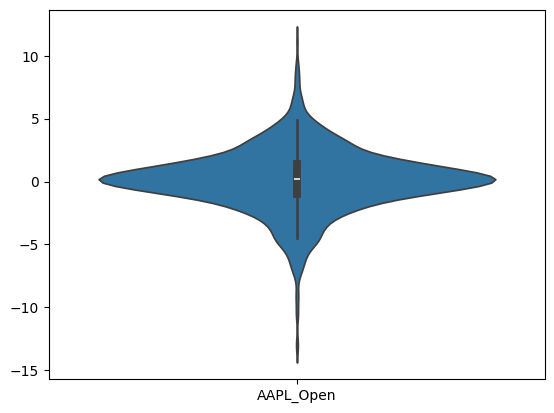

In [95]:
apple_diff = pd.DataFrame(data_open['AAPL_Open']).diff().dropna()
sns.violinplot(apple_diff)
print(np.mean(apple_diff), np.median(apple_diff))

In [107]:
def lstm_apple_modeling_v4(data_open, stock_list_greater_point_five_corr_apple_open,
                        stock_list_greater_point_five_corr_apple_volume,
                        stock_list_greater_point_five_corr_apple_low,
                        stock_list_greater_point_five_corr_apple_high,    
                        stock_list_greater_point_five_corr_apple_close,
                        n_features_selected,
                       differencing_flag, standardize_flag, day_of_year_flag, day_of_week_flag,
                       volume_all_stocks_flag, low_all_stocks_flag, high_all_stocks_flag, close_all_stocks_flag, lstm_units,
                          lag_len = 10):

    '''VERSION 2 INCLUDES THE CLOSED SALE PRICE AND ABILITY TO INCREASE LAG SIZE
        data_open is the data frame data_open
       stock_list_greater_point_five_corr_apple_open is stock_list_greater_point_five_corr_apple_open
       n_features_selected is between 1 and 761
       all flags are booleans
       lstm_units is the number of units in the lstm'''
    ### Original data and the number of additional points that we want
    n_features_selected = n_features_selected
    data_only_apple_corr = data_open[stock_list_greater_point_five_corr_apple_open[0:n_features_selected]]
    try:
        data_only_apple_corr = data_only_apple_corr.drop(['AAPL_Open'])
    except:
        pass
    data_only_apple_corr['AAPL_Open'] = data_open['AAPL_Open'].copy()

    ### Data Adjustments
    differencing_flag = differencing_flag
    standardize_flag = standardize_flag
    day_of_year_flag = day_of_year_flag
    day_of_week_flag = day_of_week_flag
    
    volume_all_stocks_flag = volume_all_stocks_flag 
    low_all_stocks_flag = low_all_stocks_flag
    high_all_stocks_flag = high_all_stocks_flag
    
    lstm_units = lstm_units
    
    ### Differencing
    if differencing_flag == True:
        data_only_apple_corr = data_only_apple_corr.diff().dropna()
    
    ### Introducing a new variable, number of the day in the year
    
    if day_of_year_flag == True:
        day_of_year_list = []
        for val in data_only_apple_corr.index:
            day_of_year = pd.Period(val).day_of_year
            day_of_year_list.append(day_of_year)
        data_only_apple_corr['day_of_year'] = day_of_year_list
    
    if day_of_week_flag == True:
        day_of_week_list = []
        for val in data_only_apple_corr.index:
            day_of_week = pd.Period(val).day_of_week
            day_of_week_list.append(day_of_week)
        data_only_apple_corr['day_of_week'] = day_of_week_list
    
    if volume_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_volume[stock_list_greater_point_five_corr_apple_volume[0:n_features_selected]],
                                       on='Date')
    if low_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_low[stock_list_greater_point_five_corr_apple_low[0:n_features_selected]],
                                       on='Date')
    
    if high_all_stocks_flag == True:
        data_only_apple_corr = pd.merge(data_only_apple_corr, 
                                        data_high[stock_list_greater_point_five_corr_apple_high[0:n_features_selected]],
                                       on='Date')

    column_indices = {name: i for i, name in enumerate(data_only_apple_corr.columns)}
    n = len(data_only_apple_corr)
    train_df = data_only_apple_corr[0:int(n*0.7)]
    val_df = data_only_apple_corr[int(n*0.7):int(n*0.9)]
    test_df = data_only_apple_corr[int(n*0.9):]
    num_features = data_only_apple_corr.shape[1]


    train_mean = train_df.mean()
    train_std = train_df.std()
    
    if standardize_flag == True:
        train_df = (train_df - train_mean) / train_std
        val_df = (val_df - train_mean) / train_std
        test_df = (test_df - train_mean) / train_std

    @property
    def train(self):
      return self.make_dataset(self.train_df)
    
    @property
    def val(self):
      return self.make_dataset(self.val_df)
    
    @property
    def test(self):
      return self.make_dataset(self.test_df)
    
    @property
    def example(self):
      """Get and cache an example batch of `inputs, labels` for plotting."""
      result = getattr(self, '_example', None)
      if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
      return result
    
    WindowGenerator.train = train
    WindowGenerator.val = val
    WindowGenerator.test = test
    WindowGenerator.example = example

    baseline = Baseline(label_index=column_indices['AAPL_Open'])
    
    baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.MeanAbsoluteError(),
                             tf.keras.metrics.MeanAbsolutePercentageError()])
    
    val_performance = {}
    performance = {}
    val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
    performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

    
    wide_window = WindowGenerator(
        input_width=lag_len, label_width=lag_len, shift=1,
        label_columns=['AAPL_Open'])

    lstm_model = tf.keras.models.Sequential([
        # Shape [batch, time, features] => [batch, time, lstm_units]
        tf.keras.layers.LSTM(lstm_units, return_sequences=True),
        # Shape => [batch, time, features]
        tf.keras.layers.Dense(units=1),
    ])

    history = compile_and_fit(lstm_model, wide_window)

    IPython.display.clear_output()
    val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
    performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

    for key in performance:
        for key2 in performance[key]:
            performance[key][key2] = np.round(performance[key][key2], 5)

    return [n_features_selected, differencing_flag, standardize_flag, day_of_year_flag, day_of_week_flag,
            volume_all_stocks_flag, low_all_stocks_flag, high_all_stocks_flag, lstm_units, performance]

In [108]:
output = lstm_apple_modeling_v4(data_open, stock_list_greater_point_five_corr_apple_open,
                                            stock_list_greater_point_five_corr_apple_volume,
                                            stock_list_greater_point_five_corr_apple_low,
                                            stock_list_greater_point_five_corr_apple_high,    
                                            stock_list_greater_point_five_corr_apple_close,
                                            n_features_selected = 761,
                                            differencing_flag = True, standardize_flag = True,
                                            day_of_year_flag = False, day_of_week_flag = False,
                                            volume_all_stocks_flag = False, low_all_stocks_flag = False, 
                                            high_all_stocks_flag = False, close_all_stocks_flag=True, 
                                            lstm_units=128, lag_len=20)

8/8 [==============================] - 0s 5ms/step - loss: 1.7472 - mean_absolute_error: 1.0691 - mean_absolute_percentage_error: 810.7711


In [109]:
output

[761,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 128,
 {'Baseline': {'loss': 1.84789,
   'mean_absolute_error': 1.02331,
   'mean_absolute_percentage_error': 490.315},
  'LSTM': {'loss': 1.59249,
   'mean_absolute_error': 1.03056,
   'mean_absolute_percentage_error': 717.94232}}]

In [115]:
grid_search_lag_df = pd.DataFrame(columns=['lag_len', 'baseline_MAE','LSTM_MAE'])
for a in [10,20,30,40,50,75,100,150,200,250]:
    output = lstm_apple_modeling_v4(data_open, stock_list_greater_point_five_corr_apple_open,
                                            stock_list_greater_point_five_corr_apple_volume,
                                            stock_list_greater_point_five_corr_apple_low,
                                            stock_list_greater_point_five_corr_apple_high,    
                                            stock_list_greater_point_five_corr_apple_close,
                                            n_features_selected = 761,
                                            differencing_flag = True, standardize_flag = True,
                                            day_of_year_flag = False, day_of_week_flag = False,
                                            volume_all_stocks_flag = False, low_all_stocks_flag = False, 
                                            high_all_stocks_flag = False, close_all_stocks_flag=True, 
                                            lstm_units=128, lag_len=a)
    grid_search_lag_df.loc[len(grid_search_lag_df)] = [a, output[-1]['Baseline']['mean_absolute_error'],
                                                        output[-1]['LSTM']['mean_absolute_error']]
    

4/4 [==============================] - 0s 16ms/step - loss: 1.4224 - mean_absolute_error: 0.9189 - mean_absolute_percentage_error: 1066.6063


KeyError: 'mean_absolute_error'

In [116]:
grid_search_lag_df

,lag_len,baseline_MAE,LSTM_MAE
0,10.0,1.02331,1.00370
1,20.0,1.02331,0.95889
2,30.0,1.02331,0.73501
3,40.0,1.02331,1.24188
4,50.0,1.02331,0.89036
5,75.0,1.02331,0.97014
6,100.0,1.02331,1.22191


In [117]:
output

[761,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 128,
 {'Baseline': {'loss': 1.84789,
   'mean_absolute_error': 1.02331,
   'mean_absolute_percentage_error': 490.31497},
  'LSTM': {}}]

In [131]:
output = lstm_apple_modeling_v4(data_open, stock_list_greater_point_five_corr_apple_open,
                                        stock_list_greater_point_five_corr_apple_volume,
                                        stock_list_greater_point_five_corr_apple_low,
                                        stock_list_greater_point_five_corr_apple_high,    
                                        stock_list_greater_point_five_corr_apple_close,
                                        n_features_selected = 761,
                                        differencing_flag = True, standardize_flag = True,
                                        day_of_year_flag = False, day_of_week_flag = False,
                                        volume_all_stocks_flag = False, low_all_stocks_flag = False, 
                                        high_all_stocks_flag = False, close_all_stocks_flag=True, 
                                        lstm_units=256, lag_len=126)
output

4/4 [==============================] - 0s 16ms/step - loss: 1.6428 - mean_absolute_error: 1.0109 - mean_absolute_percentage_error: 1047.7495


[761,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 256,
 {'Baseline': {'loss': 1.84789,
   'mean_absolute_error': 1.02331,
   'mean_absolute_percentage_error': 490.315},
  'LSTM': {}}]

In [132]:
# For some reason the lag 126 and onwards leads to no computation of the error.